# Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
df = pd.read_csv("C:/Users/ssair/datasets/Toyoto_Corrola.csv")
df.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [4]:
#check for missing values
df.isna().sum()

Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [5]:
df2 = df.iloc[:,2:]

In [6]:
df2

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


In [7]:
df3=df2.drop(['Cylinders'], axis = 1)

In [8]:
df3.rename(columns = {'Age_08_04':'Age'}, inplace = True)

In [9]:
df3

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,5,1025
1432,10845,72,19000,86,3,5,1015
1433,8500,71,17016,86,3,5,1015
1434,7250,70,16916,86,3,5,1015


# Correlation Matrix

In [10]:
df3.corr()

,Price,Age,KM,HP,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,0.063104,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,0.020613,1.000000


# Scatterplot between variables along with histograms

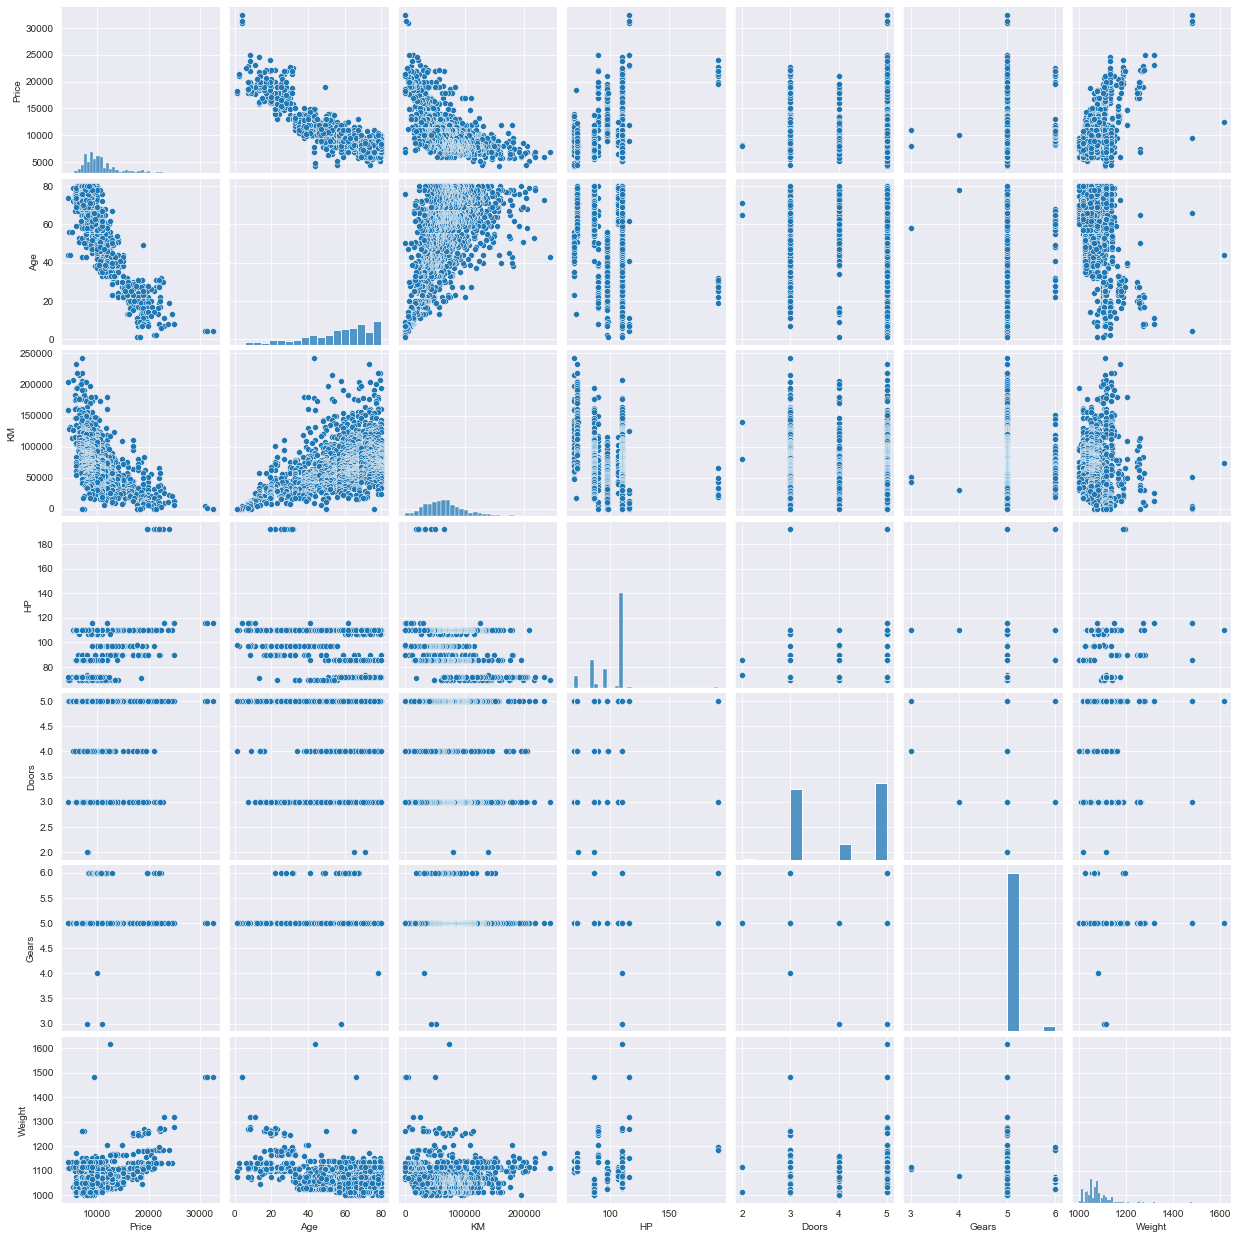

In [11]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df3)

# Preparing a model

In [12]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=df3).fit()

In [13]:
#Coefficients
model.params

Intercept   -6984.373566
Age          -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Gears         622.282925
Weight         18.609651
dtype: float64

In [14]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.323309
Age         -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age          4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [15]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8628024511073656, 0.8622263942190831)

# Calculating VIF

In [16]:
#Age+KM+HP+Doors+Gears+Weight

In [17]:
rsq_Age = smf.ols('Age~KM+HP+Doors+Gears+Weight',data=df3).fit().rsquared  
vif_Age = 1/(1-rsq_Age) 

rsq_KM = smf.ols('KM~Age+HP+Doors+Gears+Weight',data=df3).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_hp = smf.ols('HP~Age+KM+Doors+Gears+Weight',data=df3).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

rsq_do = smf.ols('Doors~Age+KM+HP+Gears+Weight',data=df3).fit().rsquared  
vif_do = 1/(1-rsq_do)

rsq_ge = smf.ols('Gears~Age+KM+HP+Doors+Weight',data=df3).fit().rsquared  
vif_ge = 1/(1-rsq_ge) 

rsq_wt = smf.ols('Weight~Age+KM+HP+Doors+Gears',data=df3).fit().rsquared  
vif_wt = 1/(1-rsq_wt)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','hp','do','ge','wt'],'VIF':[vif_Age,vif_KM,vif_hp,vif_do,vif_ge,vif_wt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.874542
1,KM,1.627039
2,hp,1.214909
3,do,1.149301
4,ge,1.096501
5,wt,1.508041


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

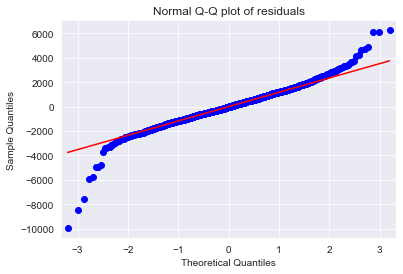

In [18]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
#list(np.where(model.resid>10))

## Residual Plot for Homoscedasticity

In [20]:
# for Z score formula 
# also able to use package - scipy.stats.zscore(arr, axis=0, ddof=0)  pass array
# function computes the relative Z-score of the input data, relative to the sample mean and standard deviation
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

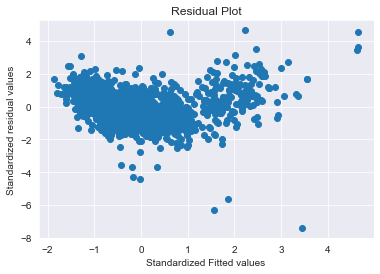

In [21]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors


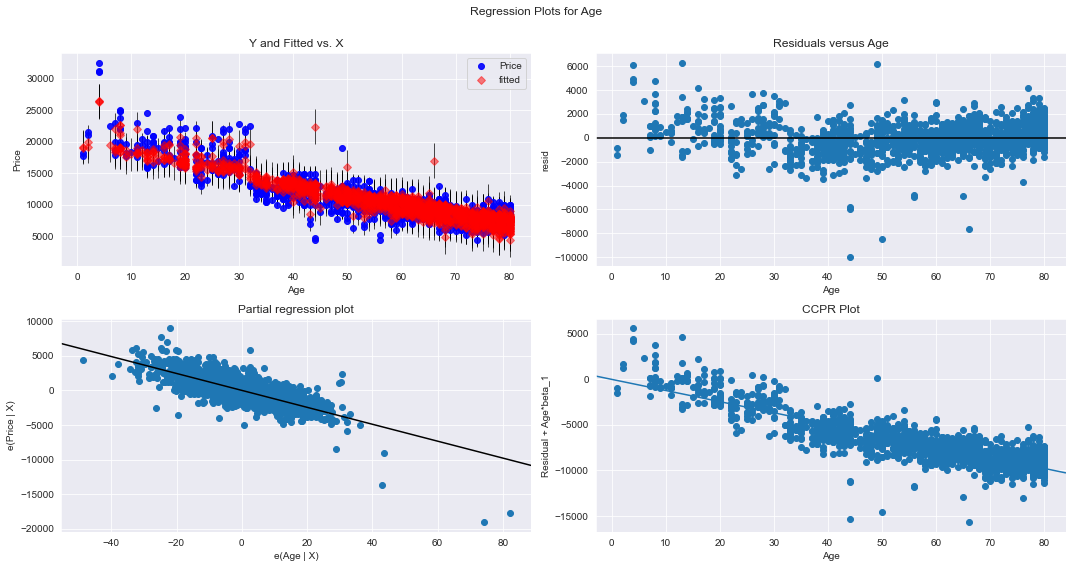

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

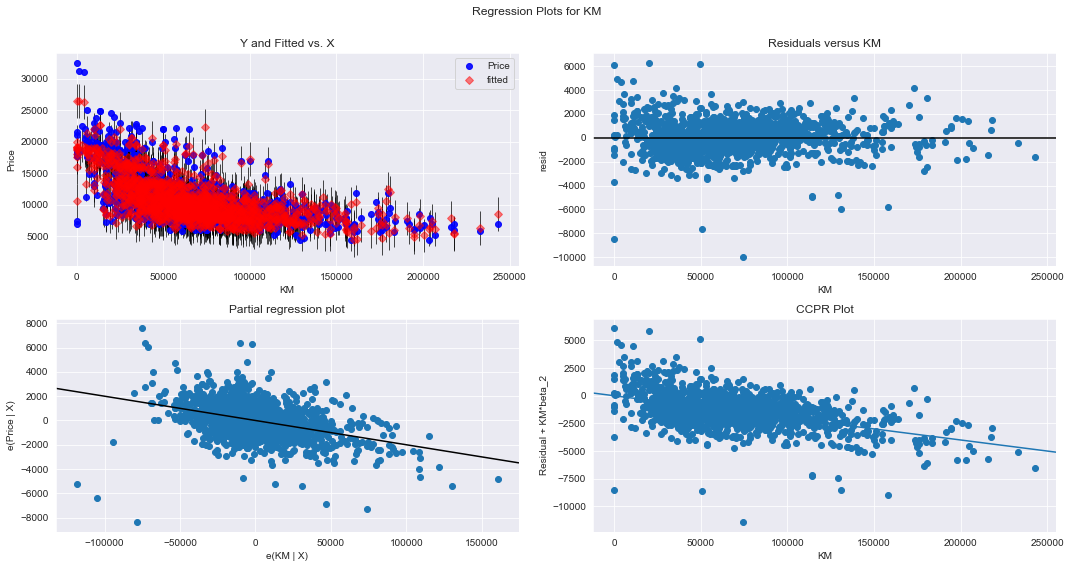

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

# Model Deletion Diagnostics

In [24]:
## Detecting Influencers/Outliers

In [25]:
## Cook’s Distance

In [26]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

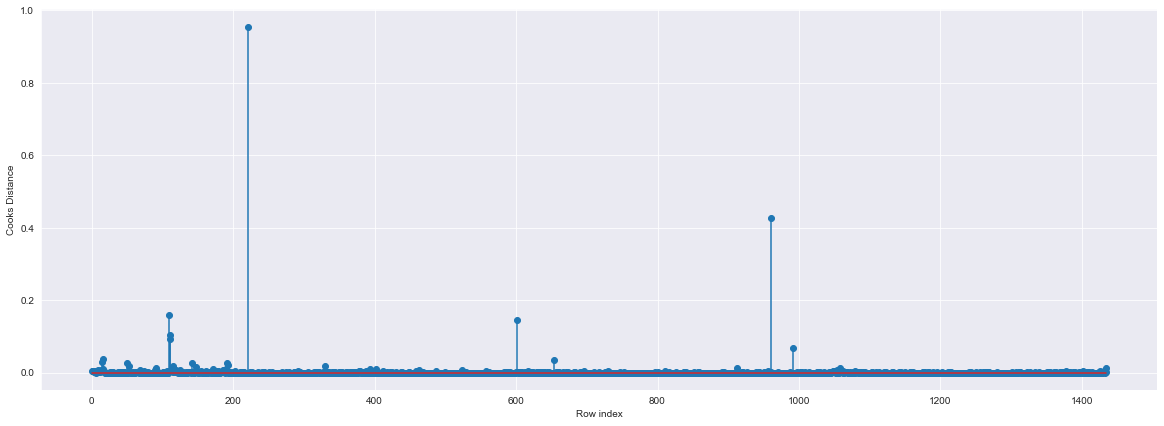

In [27]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [28]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(221, 0.9553151438688738)

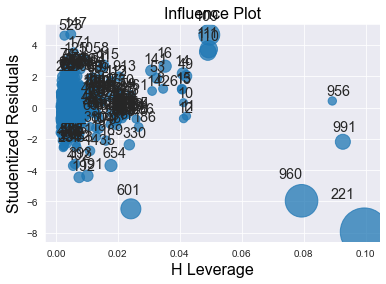

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [30]:
df3[df3.index.isin([221])]

,Price,Age,KM,HP,Doors,Gears,Weight
221,12450,44,74172,110,5,5,1615


In [31]:
#df3.head()

# Improving the model

In [32]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df4=df3.drop(df3.index[[221,960,991]],axis=0).reset_index()

# Build Model

In [33]:

final_ml_V= smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data = df4).fit()

In [34]:
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1639.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:40:33   Log-Likelihood:                -12299.
No. Observations:                1433   AIC:                         2.461e+04
Df Residuals:                    1426   BIC:                         2.465e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.024e+04   1334.194     -7.672      0.000   -1.29e+04   -7619.234
Age         -115.8096      2.586    -44.785      0.000    -120.882    -110.737
KM            -0.0217      0.001    -18.454      0.000      -0.024      -0.019
HP            27.7456      2.526     10.982      0.000      22.790      32.702
Doors        -64.3118     38.841     -1.656      0.098    -140.504      11.880
Gears        426.1870    199.109      2.140      0.032      35.610     816.764
Weight        22.6104      0.878     25.743      0.000      20.888      24.333
==============================================================================
Omnibus:                      128.887   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.667
Skew:                          -0.200   Prob(JB):                    2.62e-153
Kurtosis:                       6.407   Cond. No.                     3.07e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8733325678442629, 24611.04714508911)

In [36]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

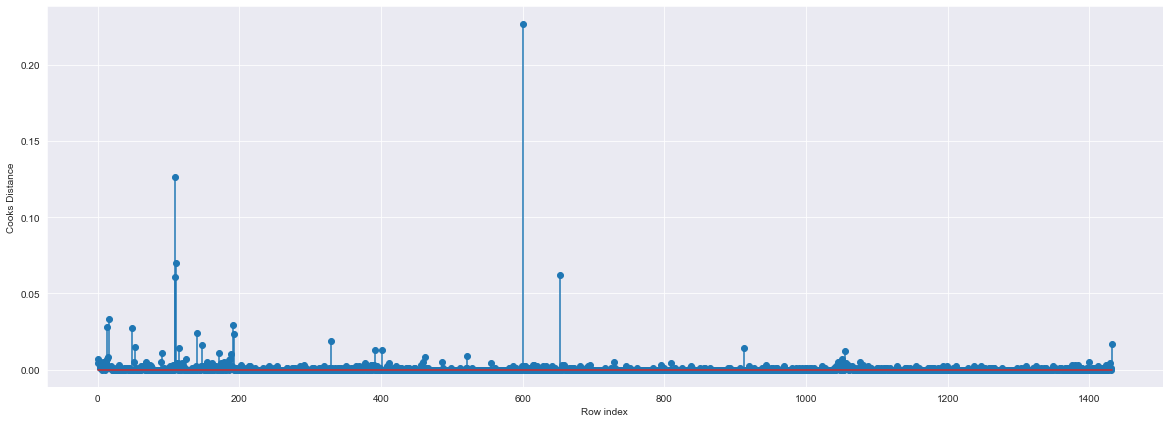

In [37]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [38]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(600, 0.22660667254135408)

In [39]:
df4[df4.index.isin([600,109,110])]

,index,Price,Age,KM,HP,Doors,Gears,Weight
109,109,32500,4,1,116,5,5,1480
110,110,31000,4,4000,116,5,5,1480
600,601,7500,50,1,90,3,5,1260


In [40]:
df5=df4.drop(df4.index[[600,109,110]],axis=0).reset_index()

In [41]:

final_ml_V= smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data = df5).fit()

In [42]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8738215199812225, 24487.426244205857)

In [43]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

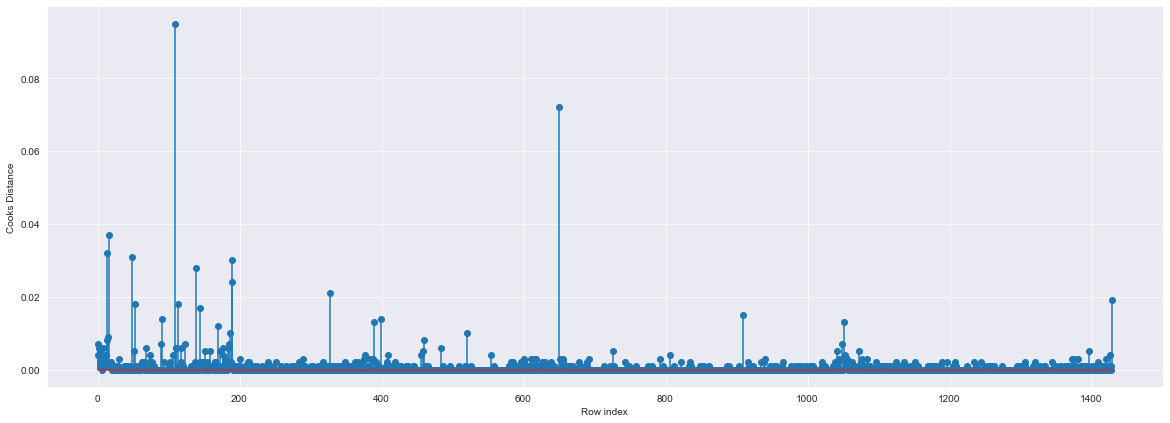

In [44]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df5)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [45]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(109, 0.09490067616556795)

In [46]:
df6 = df5.iloc[:,2:]

In [47]:
df6

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1425,7500,69,20544,86,3,5,1025
1426,10845,72,19000,86,3,5,1015
1427,8500,71,17016,86,3,5,1015
1428,7250,70,16916,86,3,5,1015


# Prediction

In [48]:
#New data for prediction
new_data=pd.DataFrame({'Age':76,"KM":1,"HP":110,"Doors":5,"Gears": 5,"Weight":1114 },index=[0])

In [49]:
new_data

,Age,KM,HP,Doors,Gears,Weight
0,76,1,110,5,5,1114


In [50]:
t=final_ml_V.predict(new_data)

In [51]:
int(t)

11014

# Final Model R^2  - 0.8738215199812225